In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import read_csv
from datetime import datetime

In [2]:
df = pd.read_excel('Data Sheet for Intern.xlsx',parse_dates=True,sheet_name='GST')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Month,Owner,Course Name,Fees Received,Fees Total,Fees Pending
1,2020-04-01 00:00:00,Pooja,NaN,7500,7500,0
2,2020-04-01 00:00:00,Deepak,NaN,8550,8550,0
3,2020-04-01 00:00:00,Pooja,NaN,6750,6750,0
4,2020-04-01 00:00:00,Deepak,NaN,8550,8550,0


In [4]:
df.shape

(1298, 6)

In [5]:
#Giving the column name
headers = df.iloc[0]
new_df  = pd.DataFrame(df.values[1:], columns=headers)
new_df.head()

,Month,Owner,Course Name,Fees Received,Fees Total,Fees Pending
0,2020-04-01 00:00:00,Pooja,NaN,7500,7500,0
1,2020-04-01 00:00:00,Deepak,NaN,8550,8550,0
2,2020-04-01 00:00:00,Pooja,NaN,6750,6750,0
3,2020-04-01 00:00:00,Deepak,NaN,8550,8550,0
4,2020-04-01 00:00:00,Deepak,NaN,5000,5000,0


In [6]:
print("No of Nan values in our dataframe : ", sum(new_df.isnull().any()))

No of Nan values in our dataframe :  6


In [7]:
new_df.dtypes

0
Month            object
Owner            object
Course Name      object
Fees Received    object
Fees Total       object
Fees Pending     object
dtype: object

In [8]:
new_df.isnull().sum()

0
Month            100
Owner            158
Course Name      397
Fees Received    151
Fees Total       158
Fees Pending     205
dtype: int64

In [9]:
print("No of Nan values in our dataframe : ", sum(new_df.isnull().any()))

No of Nan values in our dataframe :  6


In [10]:
new_data=new_df.dropna()

In [11]:
new_data.head()

,Month,Owner,Course Name,Fees Received,Fees Total,Fees Pending
52,Month,Owner,Certifiacte Print Status,Fees Received,Fees Total,Fees Pending
108,Month,Owner,Designation,Fees Received,Fees Total,Fees Pending
109,2020-06-01 00:00:00,Deepak,Nill,8550,8550,0
111,2020-06-01 00:00:00,Deepak,Executive Manager,15000,15000,0
112,2020-06-01 00:00:00,Pooja,Na,7600,7600,0


In [12]:
print("No of Nan values in our dataframe : ", sum(new_data.isnull().any()))

No of Nan values in our dataframe :  0


In [13]:
import missingno as msno

<AxesSubplot:>

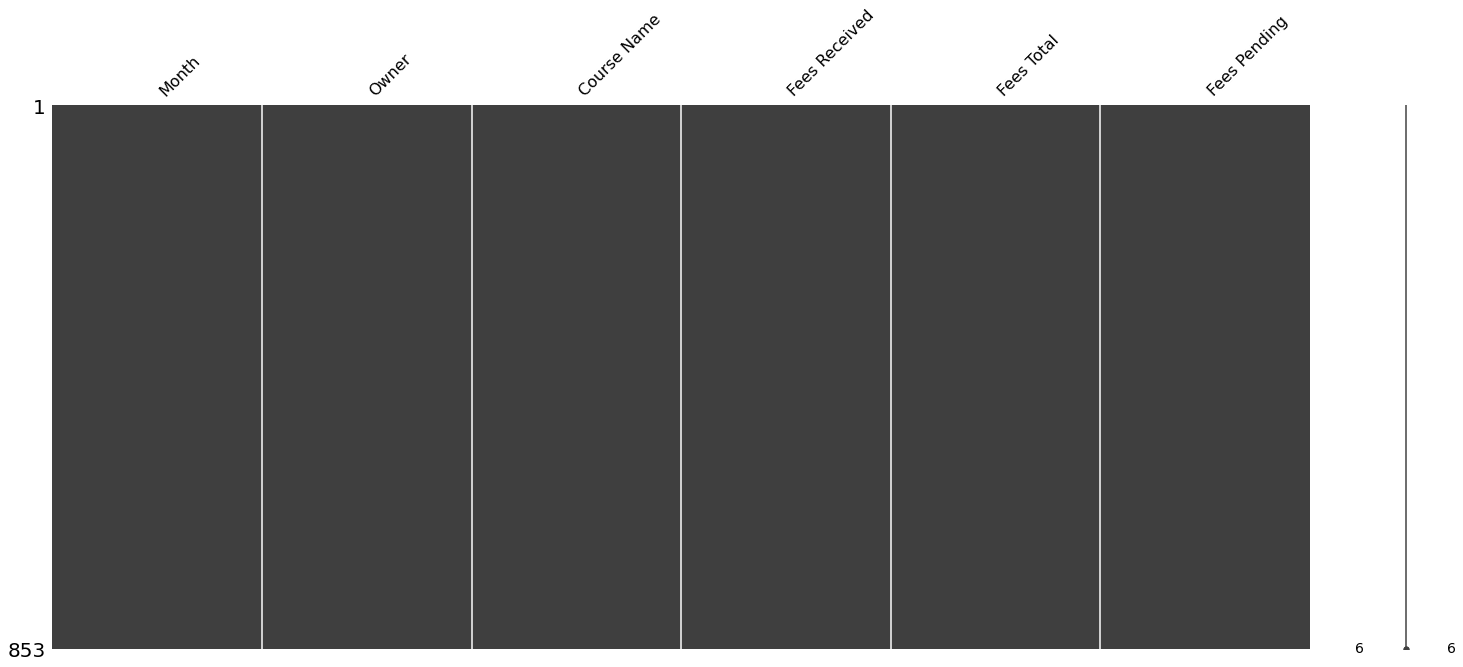

In [14]:
# Visualize missing values as a matrix
msno.matrix(new_data)

In [15]:
new_data.shape

(853, 6)

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\matrix.py:301: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

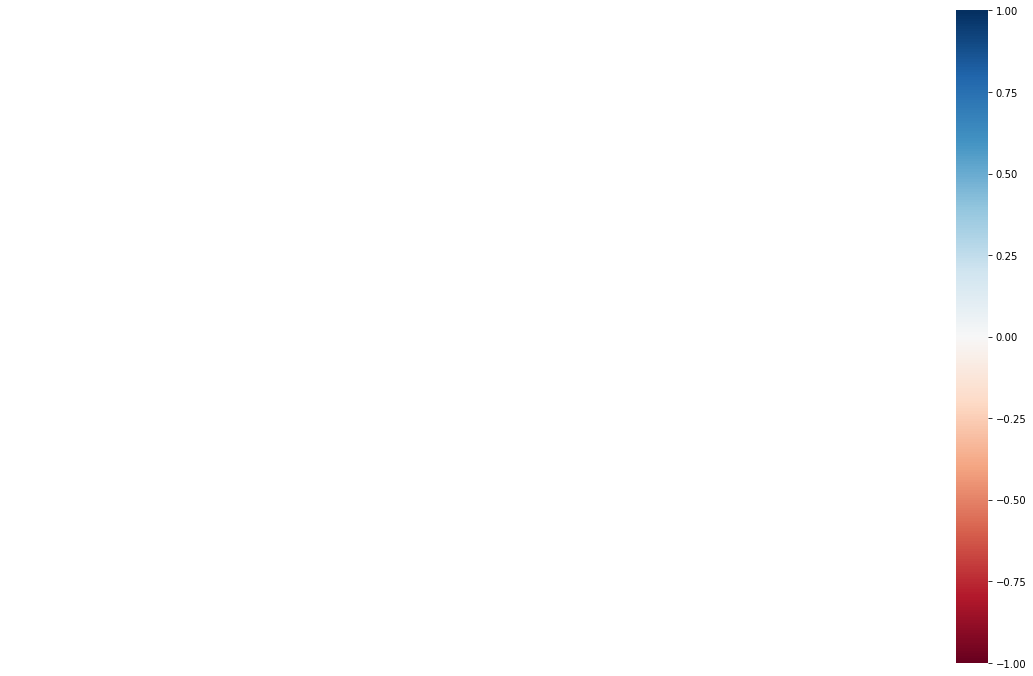

In [16]:
msno.heatmap(new_data)

In [17]:
print(new_data.columns.values)

['Month' 'Owner' 'Course Name' 'Fees Received' 'Fees Total' 'Fees Pending']


In [18]:
#Removing Duplicates
dup_bool = new_data.duplicated(['Month' ,'Owner', 'Course Name' ,'Fees Received', 'Fees Total' ,'Fees Pending'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 189


In [19]:
new_data.drop_duplicates(keep=False,inplace=True)

<ipython-input-19-f4147f4e496b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop_duplicates(keep=False,inplace=True)


In [20]:
#Removing Duplicates
dup_bool = new_data.duplicated(['Month' ,'Owner', 'Course Name' ,'Fees Received', 'Fees Total' ,'Fees Pending'])
dups = sum(dup_bool) # by considering all columns.
print("Number of duplicate rows in dataset = {}".format(dups))

Number of duplicate rows in dataset = 0


In [21]:
new_data.head()

,Month,Owner,Course Name,Fees Received,Fees Total,Fees Pending
52,Month,Owner,Certifiacte Print Status,Fees Received,Fees Total,Fees Pending
109,2020-06-01 00:00:00,Deepak,Nill,8550,8550,0
111,2020-06-01 00:00:00,Deepak,Executive Manager,15000,15000,0
112,2020-06-01 00:00:00,Pooja,Na,7600,7600,0
113,2020-06-01 00:00:00,Deepak,Assistant,7500,7500,0


In [22]:
new_data.describe(include="all")

,Month,Owner,Course Name,Fees Received,Fees Total,Fees Pending
count,555,555,555,555,555,555
unique,15,27,133,135,127,49
top,2021-06-01 00:00:00,Deepak,GST,7500,7500,0
freq,99,118,106,34,34,497


In [23]:
#Checking for the NaN values.
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 52 to 1285
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          555 non-null    object
 1   Owner          555 non-null    object
 2   Course Name    555 non-null    object
 3   Fees Received  555 non-null    object
 4   Fees Total     555 non-null    object
 5   Fees Pending   555 non-null    object
dtypes: object(6)
memory usage: 30.4+ KB
None


In [24]:
new_data.dtypes

0
Month            object
Owner            object
Course Name      object
Fees Received    object
Fees Total       object
Fees Pending     object
dtype: object

In [25]:
data=new_data.set_index('Month').copy()

In [64]:
data.to_csv('GST.csv')

In [26]:
data.head()

,Owner,Course Name,Fees Received,Fees Total,Fees Pending
Month,,,,,
Month,Owner,Certifiacte Print Status,Fees Received,Fees Total,Fees Pending
2020-06-01 00:00:00,Deepak,Nill,8550,8550,0
2020-06-01 00:00:00,Deepak,Executive Manager,15000,15000,0
2020-06-01 00:00:00,Pooja,Na,7600,7600,0
2020-06-01 00:00:00,Deepak,Assistant,7500,7500,0


In [27]:
data.dtypes

0
Owner            object
Course Name      object
Fees Received    object
Fees Total       object
Fees Pending     object
dtype: object

In [28]:
for i in data.columns:
    print(data[i].unique())
    print("\n")

['Owner' 'Deepak' 'Pooja' 'Vibhati' 'Anam' 'Vikas' 'Akansha' 'Poonam'
 'Faiza' 'Sunita' 'Mushir' 'Shanno' 'Tinki' 'Kamal' 'Parminder' 'Anjali'
 'Varsha' 'Danish' 'APOORVA' 'Sharoon' 'Arya' 'Deepak Arya' 'Jyoti'
 'Urvashi' 'Diwakar' 'sharoon' 'Ajay']


['Certifiacte Print Status' 'Nill' 'Executive Manager' 'Na' 'Assistant'
 'CA' 'Accounts Payable' 'ASSISTANT Coissioner commercial Taxes' 'na'
 'DEPUTY MANAGER' 'Account Executive' 'Commercial Officer'
 'Tax consultant' 'Assistant Professor' 'Credit Manager' 'nill'
 'HEAD FINANCE' 'proprite' 'Accounts and HR' 'MD' 'Sr. Director-Finance'
 '25/10/2020' datetime.datetime(2020, 3, 10, 0, 0)
 datetime.datetime(2020, 11, 10, 0, 0) '17/10/2020' 'GST' 'INCOMETAX'
 'COMBO' 'income tax' 'gst' 'combo' 'EXCEL' 'excel' 'gst and income tax'
 'GST and income ta' 'gst and income ta' 'Income tax' 'gst and it' 'IT'
 'catp 2 modules kiya h isne' 'CATP' 'GST + income tax' 'SAP' 'Sap' 'catp'
 'advance excel' 'Sap And Fico' 'Income Tax' 'GST & INCOMETAX'
 'GST 

In [29]:
data['Course Name'].replace({"Fees Total": "0", "Fees Pending": "0", "Certifiacte Print Status":"0","Fees Received":"0","Owner":"0","Month":"0"}, inplace=True)
data['Fees Received'].replace({"Fees Total": "0", "Fees Pending": "0", "Certifiacte Print Status":"0","Fees Received":"0","Owner":"0","Month":"0"}, inplace=True)
data['Fees Pending'].replace({"Fees Total": "0", "Fees Pending": "0", "Certifiacte Print Status":"0","Fees Received":"0","Owner":"0","Month":"0"}, inplace=True)
data['Owner'].replace({"Fees Total": "0", "Fees Pending": "0", "Certifiacte Print Status":"0","Fees Received":"0","Owner":"0","Month":"0"}, inplace=True)
data['Fees Total'].replace({"Fees Total": "0", "Fees Pending": "0", "Certifiacte Print Status":"0","Fees Received":"0","Owner":"0","Month":"0"}, inplace=True)

In [30]:
data.head()

,Owner,Course Name,Fees Received,Fees Total,Fees Pending
Month,,,,,
Month,0,0,0,0,0
2020-06-01 00:00:00,Deepak,Nill,8550,8550,0
2020-06-01 00:00:00,Deepak,Executive Manager,15000,15000,0
2020-06-01 00:00:00,Pooja,Na,7600,7600,0
2020-06-01 00:00:00,Deepak,Assistant,7500,7500,0


In [31]:
for i in data.columns:
    print(data[i].unique())
    print("\n")

['0' 'Deepak' 'Pooja' 'Vibhati' 'Anam' 'Vikas' 'Akansha' 'Poonam' 'Faiza'
 'Sunita' 'Mushir' 'Shanno' 'Tinki' 'Kamal' 'Parminder' 'Anjali' 'Varsha'
 'Danish' 'APOORVA' 'Sharoon' 'Arya' 'Deepak Arya' 'Jyoti' 'Urvashi'
 'Diwakar' 'sharoon' 'Ajay']


['0' 'Nill' 'Executive Manager' 'Na' 'Assistant' 'CA' 'Accounts Payable'
 'ASSISTANT Coissioner commercial Taxes' 'na' 'DEPUTY MANAGER'
 'Account Executive' 'Commercial Officer' 'Tax consultant'
 'Assistant Professor' 'Credit Manager' 'nill' 'HEAD FINANCE' 'proprite'
 'Accounts and HR' 'MD' 'Sr. Director-Finance' '25/10/2020'
 datetime.datetime(2020, 3, 10, 0, 0)
 datetime.datetime(2020, 11, 10, 0, 0) '17/10/2020' 'GST' 'INCOMETAX'
 'COMBO' 'income tax' 'gst' 'combo' 'EXCEL' 'excel' 'gst and income tax'
 'GST and income ta' 'gst and income ta' 'Income tax' 'gst and it' 'IT'
 'catp 2 modules kiya h isne' 'CATP' 'GST + income tax' 'SAP' 'Sap' 'catp'
 'advance excel' 'Sap And Fico' 'Income Tax' 'GST & INCOMETAX'
 'GST  AND INCOME TAX' 'HR PAYROL

In [32]:
data.shape

(555, 5)

In [33]:
data.head()

,Owner,Course Name,Fees Received,Fees Total,Fees Pending
Month,,,,,
Month,0,0,0,0,0
2020-06-01 00:00:00,Deepak,Nill,8550,8550,0
2020-06-01 00:00:00,Deepak,Executive Manager,15000,15000,0
2020-06-01 00:00:00,Pooja,Na,7600,7600,0
2020-06-01 00:00:00,Deepak,Assistant,7500,7500,0


In [34]:
data["Fees Total"] = pd.to_numeric(data["Fees Total"])
data["Fees Received"] = pd.to_numeric(data["Fees Received"])

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
len(data)

555

In [37]:
data.head()

,Owner,Course Name,Fees Received,Fees Total,Fees Pending
Month,,,,,
Month,0,0,0,0,0
2020-06-01 00:00:00,Deepak,Nill,8550,8550,0
2020-06-01 00:00:00,Deepak,Executive Manager,15000,15000,0
2020-06-01 00:00:00,Pooja,Na,7600,7600,0
2020-06-01 00:00:00,Deepak,Assistant,7500,7500,0


In [38]:
train = data[["Fees Total"]].iloc[:400]
test = data[["Fees Total"]].iloc[400:]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [41]:
scaled_train[:10]

array([[0.        ],
       [0.16101695],
       [0.28248588],
       [0.14312618],
       [0.14124294],
       [0.17890772],
       [0.14124294],
       [0.14124294],
       [0.32015066],
       [0.17890772]])

In [42]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [43]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [44]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [45]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.16101695 0.28248588]
Predict this y: 
 [[0.14312618]]


In [46]:
X.shape

(1, 3, 1)

In [47]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [49]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [51]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
388/388 [==============================] - 16s 2ms/step - loss: 0.0365
Epoch 2/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0250
Epoch 3/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0265
Epoch 4/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0263A: 0
Epoch 5/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0291
Epoch 6/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0227
Epoch 7/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0273
Epoch 8/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0286
Epoch 9/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0294
Epoch 10/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0247
Epoch 11/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0294
Epoch 12/50
388/388 [==============================] - 1s 2ms/step - loss: 0.0258A: 0s - lo
Epoch 13/5

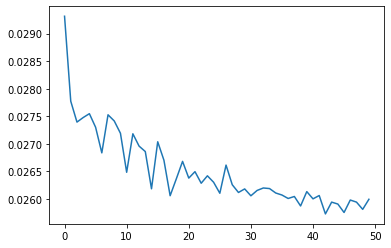

In [52]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [53]:
last_train_batch = scaled_train[-12:]

In [54]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [55]:
model.predict(last_train_batch)

array([[0.28640777]], dtype=float32)

In [56]:
scaled_test[0]

array([0.15065913])

In [57]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [58]:
test_predictions

[array([0.28640777], dtype=float32),
 array([0.27134803], dtype=float32),
 array([0.259461], dtype=float32),
 array([0.26152307], dtype=float32),
 array([0.25738475], dtype=float32),
 array([0.24933651], dtype=float32),
 array([0.24078906], dtype=float32),
 array([0.24269737], dtype=float32),
 array([0.2342288], dtype=float32),
 array([0.22934265], dtype=float32),
 array([0.2147036], dtype=float32),
 array([0.20067456], dtype=float32),
 array([0.20039289], dtype=float32),
 array([0.19772844], dtype=float32),
 array([0.19653982], dtype=float32),
 array([0.1954109], dtype=float32),
 array([0.1937573], dtype=float32),
 array([0.19201526], dtype=float32),
 array([0.19125739], dtype=float32),
 array([0.19009976], dtype=float32),
 array([0.1888636], dtype=float32),
 array([0.1872288], dtype=float32),
 array([0.18532339], dtype=float32),
 array([0.18424249], dtype=float32),
 array([0.18391192], dtype=float32),
 array([0.18352295], dtype=float32),
 array([0.18323858], dtype=float32),
 array([0

In [59]:
test.head()

,Fees Total
Month,
2021-06-01 00:00:00,8000
2021-06-01 00:00:00,22500
2021-06-01 00:00:00,7500
2021-06-01 00:00:00,12500
2021-06-01 00:00:00,29500


In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='Month'>

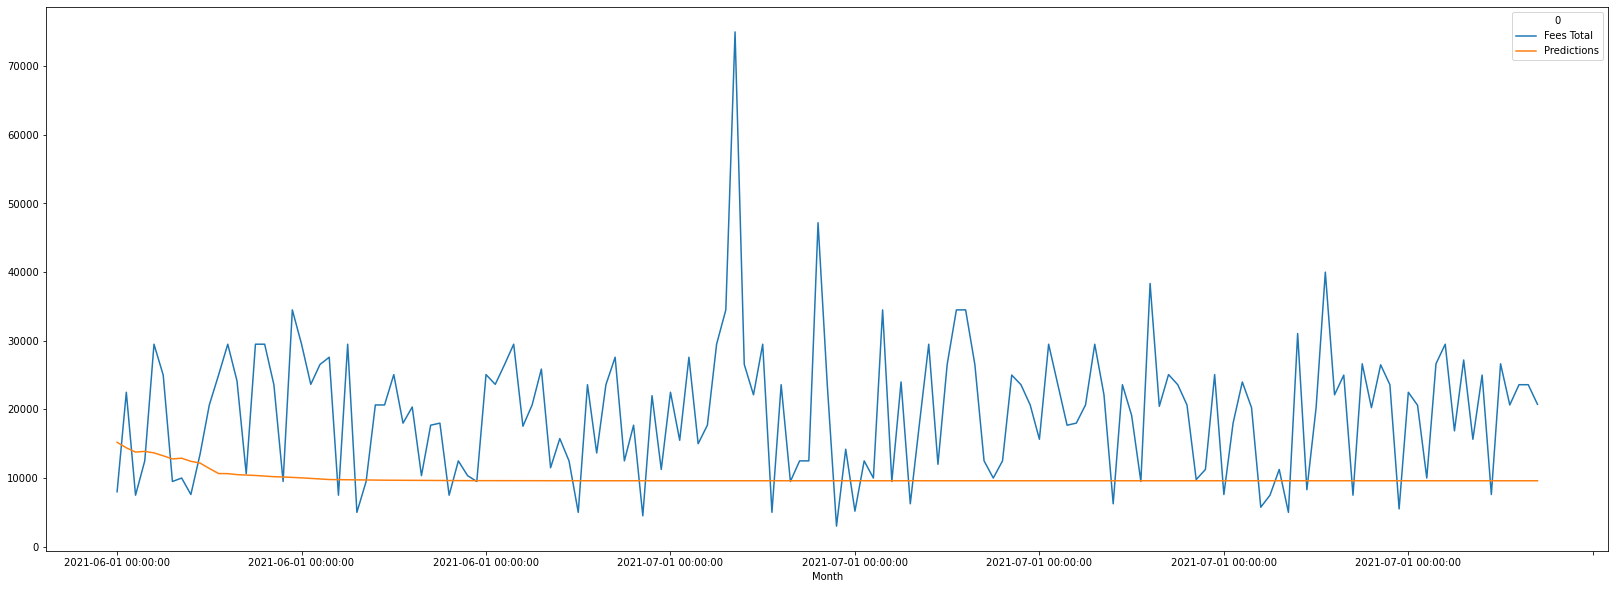

In [62]:
test.plot(figsize=(28,10))

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Fees Total'],test['Predictions']))
print(rmse)

13818.424290977158


In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [82]:
stepwise_fit=auto_arima(data['Fees Received'],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11588.032, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11948.776, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11802.942, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11585.447, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11946.783, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11587.303, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11582.912, Time=0.47 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11587.736, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11593.634, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11597.202, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11589.023, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11591.099, Time=0.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.583 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  555
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -5786.456
Date:                Wed, 04 Aug 2021   AIC                          11582.912
Time:                        20:20:21   BIC                          11604.498
Sample:                             0   HQIC                         11591.344
                                - 555                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.2992      8.891      3.970      0.000      17.874      52.724
ar.L1         -0.8563      0.088     -9.703      0.000      -1.029      -0.683
ma.L1         -0.0756      0.070     -1.077      0.281      -0.213       0.062
ma.L2         -0.9023      0.068    -13.306      0.000      -1.035      -0.769
sigma2      6.883e+07   8.63e-06   7.98e+12      0.000    6.88e+07    6.88e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                54.07
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.68e+27. Standard errors may be unstable.
"""

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
print(data.shape)

(555, 5)


In [86]:
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape ,test.shape)

(525, 5) (30, 5)


In [87]:
model=ARIMA(train['Fees Received'],order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Fees Received   No. Observations:                  524
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5466.567
Method:                       css-mle   S.D. of innovations           8182.716
Date:                Wed, 04 Aug 2021   AIC                          10943.134
Time:                        20:20:40   BIC                          10964.441
Sample:                             1   HQIC                         10951.478
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    20.1695      4.894      4.122      0.000      10.578      29.761
ar.L1.D.Fees Received    -0.8127      0.120     -6.756      0.000      -1.049      -0.577
ma.L1.D.Fees Received    -0.1122      0.100     -1.123      0.261      -0.308       0.084
ma.L2.D.Fees Received    -0.8678      0.098     -8.841      0.000      -1.060      -0.675
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2304           +0.0000j            1.2304            0.5000
MA.1            1.0108           +0.0000j            1.0108            0.0000
MA.2           -1.1401           +0.0000j            1.1401            0.5000
-----------------------------------------------------------------------------
"""

In [88]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=data.index[start:end+1]
print(pred)

Month
2021-07-01    18024.299063
2021-07-01    19484.574473
2021-07-01    18334.305624
2021-07-01    19305.742575
2021-07-01    18552.774553
2021-07-01    19201.307394
2021-07-01    18710.777950
2021-07-01    19146.015249
2021-07-01    18828.840609
2021-07-01    19123.184724
2021-07-01    18920.520262
2021-07-01    19121.796846
2021-07-01    18994.772518
2021-07-01    19134.572990
2021-07-01    19057.513042
2021-07-01    19156.705233
2021-07-01    19112.649446
2021-07-01    19185.017683
2021-07-01    19162.762921
2021-07-01    19217.412492
2021-07-01    19209.558480
2021-07-01    19252.503919
2021-07-01    19254.162378
2021-07-01    19289.376607
2021-07-01    19297.318564
2021-07-01    19327.425914
2021-07-01    19339.518461
2021-07-01    19366.252442
2021-07-01    19381.086675
2021-07-01    19405.592365
dtype: float64


In [89]:
model2=ARIMA(data['Fees Received'],order=(0,1,2))
model2=model2.fit()
new_df.tail()

,Month,Owner,Course Name,Fees Received,Fees Total,Fees Pending
1292,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,0
1293,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,0
1294,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,0
1295,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,0
1296,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,0


In [90]:
index_future_dates=pd.date_range(start='2021-08-01',end='2021-09-01')
print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+31,typ='levels').rename('ARIMA Productions')
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2021-08-01', '2021-08-02', '2021-08-03', '2021-08-04',
               '2021-08-05', '2021-08-06', '2021-08-07', '2021-08-08',
               '2021-08-09', '2021-08-10', '2021-08-11', '2021-08-12',
               '2021-08-13', '2021-08-14', '2021-08-15', '2021-08-16',
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-21', '2021-08-22', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-28',
               '2021-08-29', '2021-08-30', '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', freq='D')
2021-08-01    18961.549202
2021-08-02    18952.071574
2021-08-03    18971.276667
2021-08-04    18990.481759
2021-08-05    19009.686852
2021-08-06    19028.891945
2021-08-07    19048.097038
2021-08-08    19067.302131
2021-08-09    19086.507224
2021-08-10    19105.712317
2021-08-11    19124.917410
2021-08-12    19144.122503
2021-08-13    19163.327596
2021-08-14    19182.532689
2021-

<AxesSubplot:>

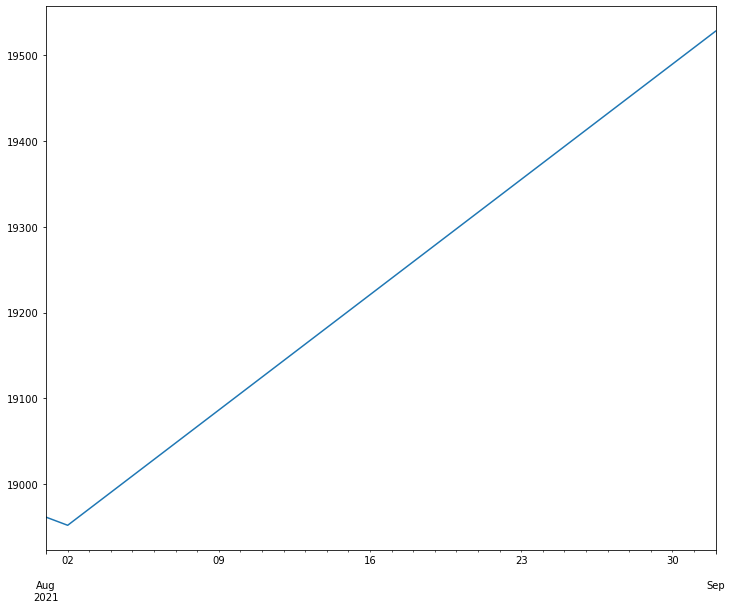

In [92]:
pred.plot(figsize=(12,10))